In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import pandas as pd
import numpy as np
import matplotlib
from IPython.display import *

import AssembleData

In [13]:

# Build Dataframe 
# MAL_df, all_genre  = AssembleData.read_files_all()
# MAL_df = MAL_df.drop_duplicates('id')

In [34]:
import pickle

# MAL_df = MAL_df.drop_duplicates('id')
# with open('1998_2015_data.pkl', 'w') as f:
#     pickle.dump(MAL_df, f)
#     pickle.dump(all_genre, f)

with open('1998_2015_data.pkl', 'r') as f:
    MAL_df = pickle.load(f)
    all_genre = pickle.load(f)

In [15]:
MAL_df['aired_start'] = pd.to_datetime(MAL_df['aired_start'])

In [16]:
def only_genre(g):
    return MAL_df[MAL_df[g] == 1]

In [17]:
from sklearn import linear_model

X = MAL_df[all_genre]
y = MAL_df["score"]

from random import shuffle
indices = list(range(len(MAL_df)))
shuffle(indices)

X_train = X.iloc[indices[:len(X)/2]]
y_train = y.iloc[indices[:len(X)/2]]
X_test = X.iloc[indices[len(X)/2:]]
y_test = y.iloc[indices[len(X)/2:]]

reg = linear_model.LinearRegression()
reg.fit (X_train, y_train)
print "least squares on random train/test, ", reg.score(X_test, y_test)

print reg.predict(X[MAL_df['title'] == 'Amagi Brilliant Park'])

least squares on random train/test,  0.23775037236
[ 6.28811495]


In [18]:
reg = linear_model.LinearRegression()
reg.fit (X, y)
print "least squares on self: ", reg.score(X, y)


least squares on self:  0.263300326087


In [19]:
print reg.predict(X[MAL_df['title'] == 'Fate/stay night'])

[ 7.1818617]


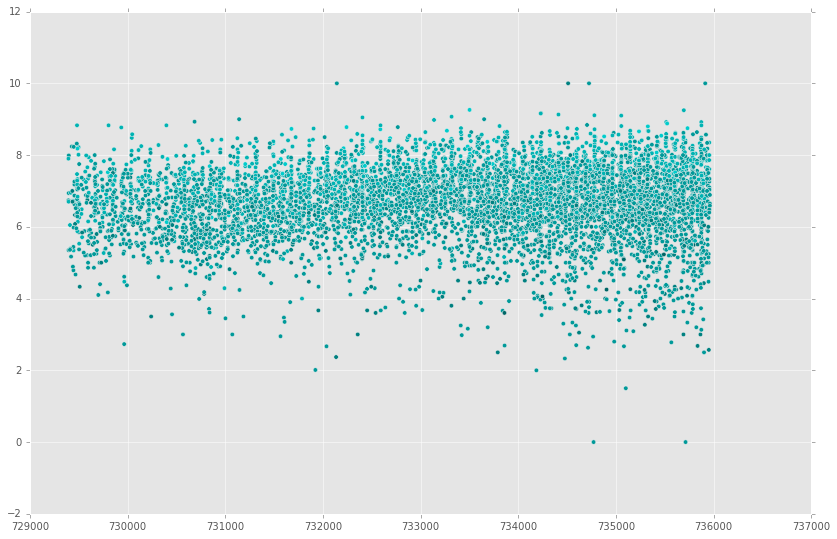

In [20]:
idx = MAL_df['aired_start'] > pd.to_datetime('1998')

colors = np.array([
        [0.0, 0.0, 0.0],
        [0.0, 0.1, 0.1],
        [0.0, 0.2, 0.2],
        [0.0, 0.3, 0.3],
        [0.0, 0.4, 0.4],
        [0.0, 0.5, 0.5],
        [0.0, 0.6, 0.6],
        [0.0, 0.7, 0.7],
        [0.0, 0.8, 0.8],
        [0.0, 0.9, 0.9],
        [0.0, 1.0, 1.0],
    ])

matplotlib.rcParams['figure.figsize'] = (14.0, 9.0)
classes = pd.Series(reg.predict(X[idx]).astype(int))
plt.scatter(MAL_df[idx]['aired_start'].apply(matplotlib.dates.date2num), MAL_df[idx]['score'], c=colors[classes])

In [46]:
X = MAL_df[all_genre]
y = MAL_df["score"]

reg = linear_model.LinearRegression()
reg.fit (X, y)

pair = zip(reg.coef_, all_genre)
pair = sorted(pair)

df = pd.DataFrame(pair)
df.columns = ['regression coefficient', 'genre']
df = df[(df['genre'] != 'hentai') & (df['genre'] != "no genres have been added yet.")]

df.head(100)
#df.head(100)
#for p in pair:
#    print p[1], ": ", p[0]

,regression coefficient,genre
1,-0.258436,horror
2,-0.239076,kids
3,-0.223369,dementia
4,-0.187298,yuri
5,-0.142839,cars
6,-0.090917,ecchi
7,-0.011351,yaoi
8,0.002065,martial arts
9,0.002654,mecha
10,0.035776,vampire


In [47]:
X = MAL_df[all_genre]
y = MAL_df["members"]

reg = linear_model.LinearRegression()
reg.fit (X, y)

pair = zip(reg.coef_, all_genre)
pair = sorted(pair)

df = pd.DataFrame(pair)

df.columns = ['regression coefficient', 'genre']
df = df[(df['genre'] != 'hentai') & (df['genre'] != "no genres have been added yet.")]

df.head(100)

,regression coefficient,genre
0,-17079.184687,shounen ai
1,-12588.960963,martial arts
2,-10832.111431,kids
3,-10577.393282,shoujo ai
4,-8646.366155,police
5,-8313.639824,cars
6,-7837.716245,mecha
7,-6019.411856,space
8,-5974.289573,dementia
9,-5638.536611,yaoi


least squares on random train/test,  0.144755707905
least squares on self:  0.178110913192
kids :  -17159.5548323
shoujo ai :  -15734.5173115
cars :  -14950.1844445
shounen ai :  -14779.5353263
dementia :  -14553.5319482
martial arts :  -12373.3228966
mecha :  -10634.4979016
space :  -9078.68780129
police :  -8576.37590003
yaoi :  -8183.55650305
yuri :  -7241.95786388
historical :  -5530.03552728
shoujo :  -4954.89582529
samurai :  -1069.19916056
demons :  -192.207981897
ecchi :  -183.93292233
no genres have been added yet. :  0.0
sports :  13.6225030037
magic :  103.42317962
music :  748.187926518
sci-fi :  3620.47350525
adventure :  4136.67162843
comedy :  5088.14750122
horror :  5442.7046263
military :  8312.06726245
shounen :  8408.94692983
parody :  8448.2954626
drama :  9097.91725125
fantasy :  11708.826524
josei :  12153.2813798
seinen :  12551.090373
game :  14092.8497975
slice of life :  16127.3637652
vampire :  16365.8209019
mystery :  18996.3008847
super power :  21099.67764

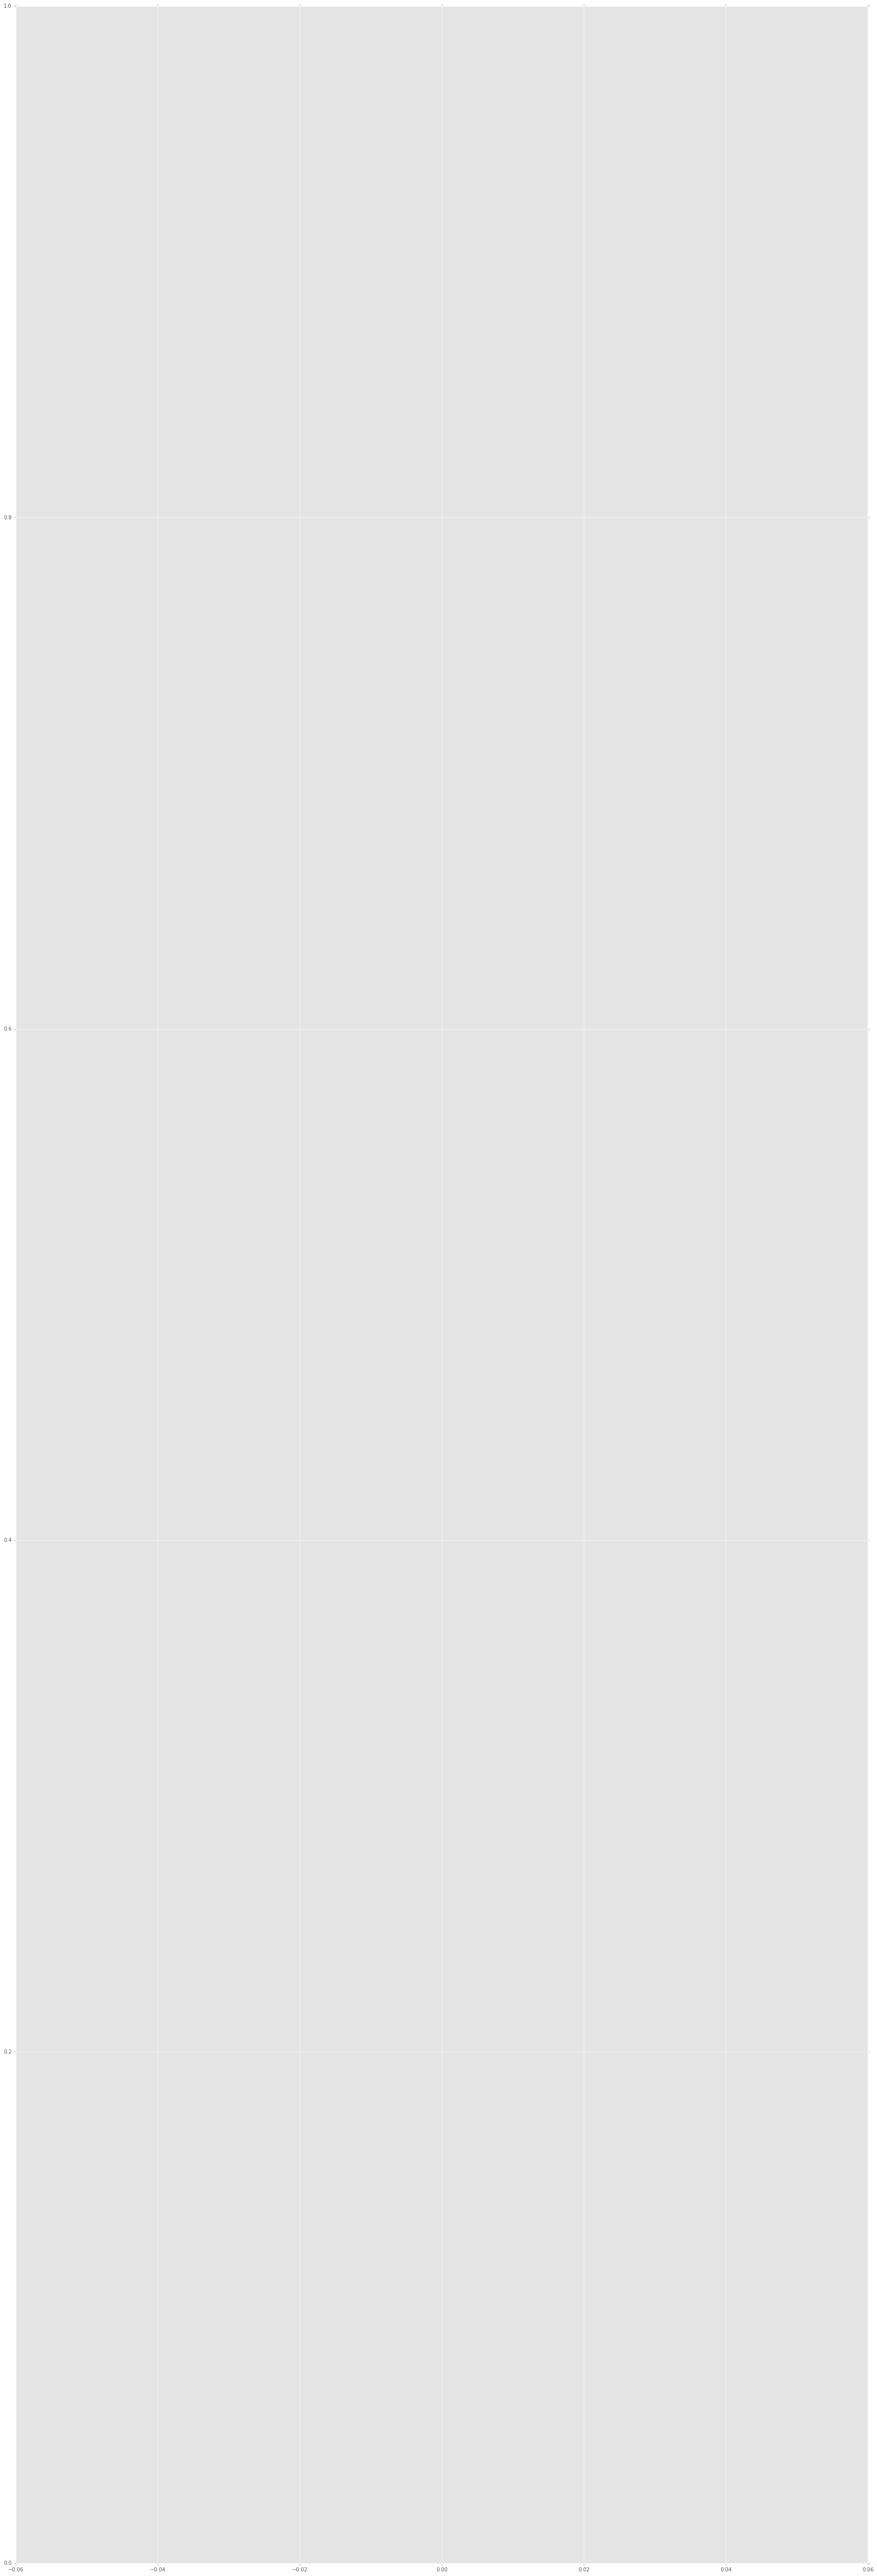

In [45]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (30.0, 90.0)
plt.figure(1)
plt.gca().set_xscale("linear")

from sklearn import linear_model

X = MAL_df[all_genre]
y = MAL_df["members"]

from random import shuffle
indices = list(range(len(MAL_df)))
shuffle(indices)

X_train = X.iloc[indices[:len(X)/2]]
y_train = y.iloc[indices[:len(X)/2]]
X_test = X.iloc[indices[len(X)/2:]]
y_test = y.iloc[indices[len(X)/2:]]

reg = linear_model.LinearRegression()
reg.fit (X_train, y_train)
print "least squares on random train/test, ", reg.score(X_test, y_test)

reg = linear_model.LinearRegression()
reg.fit (X, y)
print "least squares on self: ", reg.score(X, y)


pair = zip(reg.coef_, all_genre)
pair = sorted(pair)

for p in pair:
    print p[1], ": ", p[0]

# Shitty Regression Analysis

When using simple linear regression to predict scores and member count from the genre tags, we confirmed some of our initial suspicions and learned a bit more about the demographic of members on MyAnimeList.

The first thing that stuck out were the genres that were negatively correlated with score and member counts. Unsurprisingly, ecchi, yuri, and yaoi shows had a negative correlation, which is to be expected as shows in these genres are more sexually charged, something which is somewhat offputting to the average user. Interestinly, the kids genre was the most negatively correlated with regards to score and popularity. While this initially seems surprising, it is explained by the fact that MyAnimeList users are at the age where they've outgrown those kinds of shows. Coupled with the fact that kids shows tend to be less complex, its negative correlation is unsurprising.

As for positively correlated genres, it wasn't very surprising to find thriller, psycological, romance and action genres in those positions. Something that was surprising was to see that the harem genre was very positively correlated with popularity. 